### Домашняя работа: Урок 7. Многомерный статистический анализ. Линейная регрессия

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#### Задание 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 
#### zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
#### ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 
#### Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

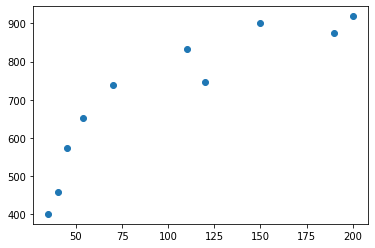

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
plt.scatter(zp,ks)
plt.show()

In [3]:
n = len(zp)
b = (n * (np.sum( zp * ks )) - (np.sum( zp ) * np.sum( ks ))) / (n * (np.sum(zp**2)) - ((np.sum(zp)**2)))
b

2.6205388824027653

In [4]:
a = np.mean(ks) - b * np.mean(zp)
a

444.17735732435955

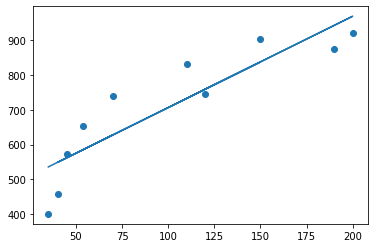

In [5]:
plt.scatter(zp,ks)
plt.plot(zp, a + b*zp)
plt.show()

#### Матричный способ:

In [6]:
zp_t = zp.reshape(10,1)
zp_t

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [7]:
ks_t = ks.reshape(10,1)
ks_t

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

#### без интерцепта:

In [8]:
B_noInt = np.dot(np.linalg.inv(np.dot(zp_t.T,zp_t)),zp_t.T@ks_t)
B_noInt

array([[5.88982042]])

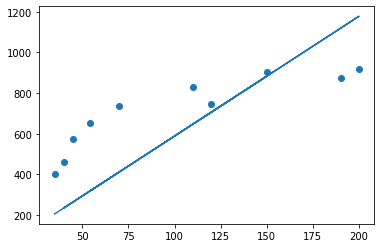

In [9]:
plt.scatter(zp_t,ks_t)
plt.plot(zp_t, B_noInt*zp_t)
plt.show()

#### с интерцептом:

In [10]:
zp_tr = np.hstack([np.ones((10,1)),zp_t])
B_Int = np.dot(np.linalg.inv(np.dot(zp_tr.T,zp_tr)),zp_tr.T@ks_t)
B_Int

array([[444.17735732],
       [  2.62053888]])

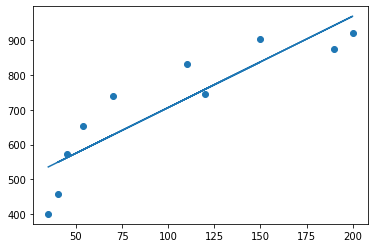

In [11]:
plt.scatter(zp_t,ks_t)
plt.plot(zp_t, B_Int[0] + B_Int[1]*zp_t)
plt.show()

#### Коэффициенты при мат. расчете и матричном способе с интерцептом - совпали.

#### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [43]:
def mse(B1, ks, zp, n):
    return np.sum((B1*zp-ks)**2)/n

alpha = 0.00001
B1 = 1
for i in range(50):
    B1 = -alpha*(2/n)*np.sum((B1*zp-ks)*zp)
    print(f'B1 = {B1}, mse = {mse(B1,ks,zp,n)}')

B1 = 1.3473020000000002, mse = 340789.7473755218
B1 = 1.251609185336, mse = 352892.9018633886
B1 = 1.2779756179460013, mse = 349532.913400198
B1 = 1.2707108220361025, mse = 350456.78596965194
B1 = 1.2727125057827489, mse = 350202.0843751784
B1 = 1.2721609778566678, mse = 350272.25179636246
B1 = 1.2723129414491967, mse = 350252.91758996417
B1 = 1.27227107061662, mse = 350258.24471901584
B1 = 1.2722826073708617, mse = 350256.7769196728
B1 = 1.2722794286258916, mse = 350257.1813449954
B1 = 1.2722803044718511, mse = 350257.0699128496
B1 = 1.272280063148262, mse = 350257.1006159695
B1 = 1.2722801296406332, mse = 350257.09215627733
B1 = 1.2722801113198574, mse = 350257.09448719316
B1 = 1.2722801163678172, mse = 350257.09384495125
B1 = 1.2722801149769427, mse = 350257.09402190946
B1 = 1.272280115360173, mse = 350257.09397315176
B1 = 1.2722801152545808, mse = 350257.0939865861
B1 = 1.2722801152836747, mse = 350257.09398288454
B1 = 1.2722801152756587, mse = 350257.09398390446
B1 = 1.27228011527

Коэффициент B1 = 1.272280115

#### 3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Если случайная величина задана нормальным распределением и известна её дисперсия, то используется таблица значений функции Лапласа. Если дисперсия не известна, а можно лишь найти её несмещенную оценку, то используется таблица распределения Стьюдента